In [ ]:
# TOPSIS Assignment – Part I

# This notebook demonstrates the implementation of the TOPSIS
# (Technique for Order Preference by Similarity to Ideal Solution)
# method for multi-criteria decision making.


In [4]:
library(dplyr)
library(ggplot2)




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Fund Name,P1,P2,P3,P4,P5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M1,0.71,0.50,5.1,37.0,10.83
M2,0.86,0.74,6.8,60.1,17.13
M3,0.92,0.85,4.9,66.6,18.32
M4,0.74,0.55,6.1,67.1,18.62
M5,0.60,0.36,4.4,55.9,15.32
M6,0.93,0.86,6.5,58.6,16.72
M7,0.75,0.56,7.0,59.5,16.95
M8,0.85,0.72,5.2,66.9,18.42


,P1,P2,P3,P4,P5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M1,0.71,0.50,5.1,37.0,10.83
M2,0.86,0.74,6.8,60.1,17.13
M3,0.92,0.85,4.9,66.6,18.32
M4,0.74,0.55,6.1,67.1,18.62
M5,0.60,0.36,4.4,55.9,15.32
M6,0.93,0.86,6.5,58.6,16.72
M7,0.75,0.56,7.0,59.5,16.95
M8,0.85,0.72,5.2,66.9,18.42


Normalized Decision Matrix:




,P1,P2,P3,P4,P5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M1,0.312936307,0.002962076,2.71684305,0.7828322,0.6577300
M2,0.458134318,0.015656643,0.41297916,26.4893972,0.1014807
M3,0.055873651,0.374642057,0.02902835,35.4787740,0.3876077
M4,0.004383873,0.292992878,0.12906152,4.0751326,8.2068648
M5,0.012694576,0.021863602,1.93932359,0.3311601,8.1611834
M6,0.409902486,0.005094772,3.46264310,1.2398369,1.0154429
M7,0.399535743,0.011848271,0.42512560,26.2249440,0.1004144
M8,0.051622395,0.317343860,0.03080560,35.6385883,0.3897235


Weighted Normalized Matrix:




,P1,P2,P3,P4,P5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M1,0.312936307,0.002962076,2.71684305,0.7828322,1.3154601
M2,0.458134318,0.015656643,0.41297916,26.4893972,0.2029615
M3,0.055873651,0.374642057,0.02902835,35.4787740,0.7752154
M4,0.004383873,0.292992878,0.12906152,4.0751326,16.4137297
M5,0.012694576,0.021863602,1.93932359,0.3311601,16.3223669
M6,0.409902486,0.005094772,3.46264310,1.2398369,2.0308857
M7,0.399535743,0.011848271,0.42512560,26.2249440,0.2008288
M8,0.051622395,0.317343860,0.03080560,35.6385883,0.7794469


Ideal Best and Ideal Worst Values:




Criteria,Ideal_Best,Ideal_Worst
<chr>,<dbl>,<dbl>
P1,0.45813432,0.004383873
P2,0.37464206,0.002962076
P3,0.02902835,3.462643105
P4,35.63858826,0.331160150
P5,16.41372966,0.200828785


Separation Measures:




,Alternative,S_Best,S_Worst
,<chr>,<dbl>,<dbl>
M1,M1,39.00493,3.537964
M2,M2,46.92932,26.664851
M3,M3,52.39190,35.646846
M4,M4,42.49642,16.426741
M5,M5,42.09670,16.791108
M6,M6,38.90422,3.920411
M7,M7,46.78614,26.399891
M8,M8,52.49677,35.805808


Final TOPSIS Result:




,Alternative,S_Best,S_Worst,Topsis_Score,Rank
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
M1,M1,39.00493,3.537964,0.08316228,8
M2,M2,46.92932,26.664851,0.36232285,3
M3,M3,52.39190,35.646846,0.40489950,2
M4,M4,42.49642,16.426741,0.27878242,6
M5,M5,42.09670,16.791108,0.28513725,5
M6,M6,38.90422,3.920411,0.09154571,7
M7,M7,46.78614,26.399891,0.36072311,4
M8,M8,52.49677,35.805808,0.40548993,1


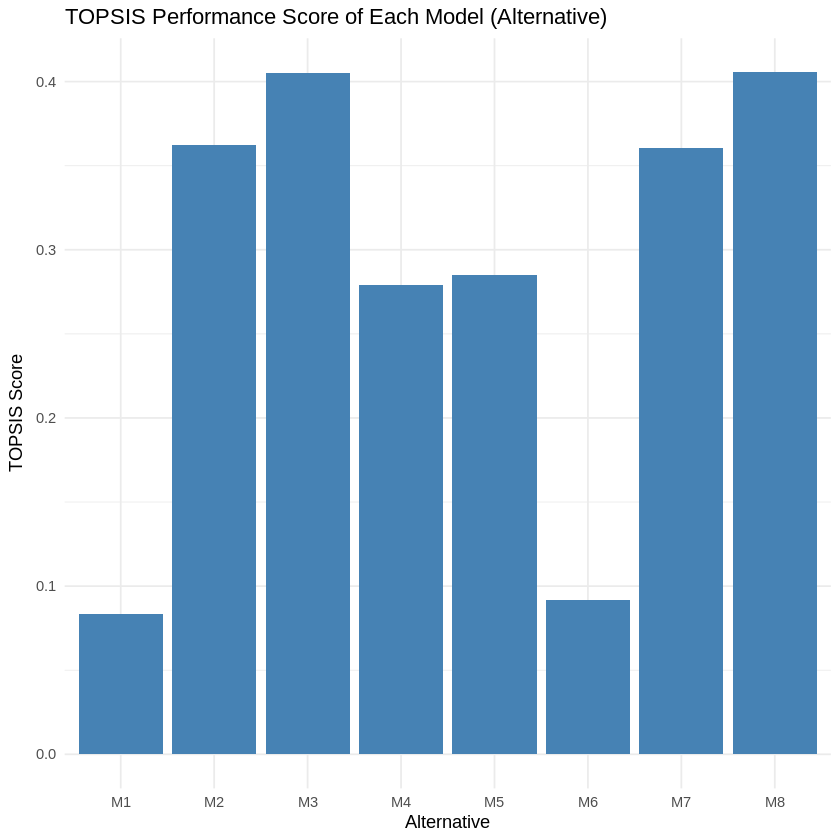

In [7]:
data <- read.csv("data.csv", check.names = FALSE)
data

weights <- c(1, 1, 1, 1, 2)
impacts <- c("+", "+", "-", "+", "+")

criteria <- data[, -1]
rownames(criteria) <- data[, 1]
criteria

norm_matrix <- criteria / sqrt(colSums(criteria^2))

cat("Normalized Decision Matrix:\n\n\n")
norm_matrix

weighted_matrix <- sweep(norm_matrix, 2, weights, "*")

cat("Weighted Normalized Matrix:\n\n\n")
weighted_matrix

ideal_best <- ideal_worst <- numeric(ncol(weighted_matrix))

for (i in 1:ncol(weighted_matrix)) {
  if (impacts[i] == "+") {
    ideal_best[i]  <- max(weighted_matrix[, i])
    ideal_worst[i] <- min(weighted_matrix[, i])
  } else {
    ideal_best[i]  <- min(weighted_matrix[, i])
    ideal_worst[i] <- max(weighted_matrix[, i])
  }
}

ideal_df <- data.frame(
  Criteria = colnames(weighted_matrix),
  Ideal_Best = ideal_best,
  Ideal_Worst = ideal_worst
)

cat("Ideal Best and Ideal Worst Values:\n\n\n")
ideal_df

s_best <- sqrt(rowSums((weighted_matrix - ideal_best)^2))
s_worst <- sqrt(rowSums((weighted_matrix - ideal_worst)^2))

separation_df <- data.frame(
  Alternative = rownames(weighted_matrix),
  S_Best = s_best,
  S_Worst = s_worst
)

cat("Separation Measures:\n\n\n")
separation_df

performance_score <- s_worst / (s_best + s_worst)

final_result <- data.frame(
  Alternative = rownames(weighted_matrix),
  S_Best = s_best,
  S_Worst = s_worst,
  Topsis_Score = performance_score,
  Rank = rank(-performance_score)
)

cat("Final TOPSIS Result:\n\n\n")
final_result

ggplot(final_result, aes(x = Alternative, y = Topsis_Score)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  theme_minimal() +
  labs(
    title = "TOPSIS Performance Score of Each Model (Alternative)",
    x = "Alternative",
    y = "TOPSIS Score"
  )





